In [ ]:
from pgmpy.models import BayesianModel

In [ ]:
!pip install pgmpy


In [ ]:
chest_clinic_model=BayesianModel([('asia','tub'),('smoke','lung'),('tub','either'),('lung','either'),('either','xray'),('either','dysp'),('smoke','bronc'),('bronc','dysp')])

In [ ]:
from pgmpy.factors.discrete import  TabularCPD

cpd_asia=TabularCPD(variable='asia',
                    variable_card=2,
                    values=[[0.01],[0.99]])
cpd_tub=TabularCPD(variable='tub',
                   variable_card=2,
                   values=[[0.05,0.01],[0.95,0.99]],
                   evidence=['asia'],
                   evidence_card=[2])
cpd_smoke=TabularCPD(variable='smoke',
                     variable_card=2,
                     values=[[0.5],[0.5]])

cpd_lung=TabularCPD(variable='lung',
                   variable_card=2,
                   values=[[0.1,0.01],[0.9,0.99]],
                   evidence=['smoke'],
                   evidence_card=[2])
cpd_bronc=TabularCPD(variable='bronc',
                   variable_card=2,
                   values=[[0.6,0.3],[0.4,0.7]],
                   evidence=['smoke'],
                   evidence_card=[2])

cpd_either=TabularCPD(variable='either',
                      variable_card=2,
                      values=[[1,1,1,0],[0,0,0,1]],
                      evidence=['tub','lung'],
                      evidence_card=[2,2])

cpd_xray=TabularCPD(variable='xray',
                   variable_card=2,
                   values=[[0.98,0.05],[0.02,0.95]],
                   evidence=['either'],
                   evidence_card=[2])
cpd_dysp=TabularCPD(variable='dysp',
                      variable_card=2,
                      values=[[0.9,0.7,0.8,0.1],[0.1,0.3,0.2,0.9]],
                      evidence=['bronc','either'],
                      evidence_card=[2,2])

In [ ]:
chest_clinic_model.add_cpds(cpd_asia,cpd_smoke,cpd_tub,cpd_lung,cpd_either,cpd_bronc,cpd_xray,cpd_dysp)

chest_clinic_model.check_model()

True

In [ ]:
chest_clinic_model.get_independencies()

(asia _|_ bronc, smoke, lung)
(asia _|_ smoke, bronc | lung)
(asia _|_ bronc, lung | smoke)
(asia _|_ xray | either)
(asia _|_ lung, xray, dysp, smoke, bronc, either | tub)
(asia _|_ smoke, lung | bronc)
(asia _|_ smoke, bronc | lung, xray)
(asia _|_ bronc | smoke, lung)
(asia _|_ bronc, smoke, xray, dysp | lung, either)
(asia _|_ xray, dysp, smoke, bronc, either | lung, tub)
(asia _|_ smoke | bronc, lung)
(asia _|_ bronc | smoke, xray)
(asia _|_ lung, dysp, smoke, bronc, either | xray, tub)
(asia _|_ xray | dysp, either)
(asia _|_ lung, xray, smoke, bronc, either | dysp, tub)
(asia _|_ bronc, xray, dysp | smoke, either)
(asia _|_ lung, xray, dysp, bronc, either | smoke, tub)
(asia _|_ lung | smoke, bronc)
(asia _|_ lung, xray, dysp, smoke, bronc | either, tub)
(asia _|_ xray, dysp | bronc, either)
(asia _|_ lung, xray, dysp, smoke, either | bronc, tub)
(asia _|_ bronc | smoke, lung, xray)
(asia _|_ smoke, bronc, dysp | lung, either, xray)
(asia _|_ smoke, bronc, dysp, either | lung, x

In [ ]:
chest_clinic_model.nodes()

NodeView(('asia', 'tub', 'smoke', 'lung', 'either', 'xray', 'dysp', 'bronc'))

In [ ]:
chest_clinic_model.edges()

OutEdgeView([('asia', 'tub'), ('tub', 'either'), ('smoke', 'lung'), ('smoke', 'bronc'), ('lung', 'either'), ('either', 'xray'), ('either', 'dysp'), ('bronc', 'dysp')])

In [ ]:
chest_clinic_model.get_cpds()

[<TabularCPD representing P(asia:2) at 0x7f567d3a30f0>,
 <TabularCPD representing P(smoke:2) at 0x7f567d3a3160>,
 <TabularCPD representing P(tub:2 | asia:2) at 0x7f567d3a30b8>,
 <TabularCPD representing P(lung:2 | smoke:2) at 0x7f567d3a3198>,
 <TabularCPD representing P(either:2 | tub:2, lung:2) at 0x7f567d3a3208>,
 <TabularCPD representing P(bronc:2 | smoke:2) at 0x7f567d3a31d0>,
 <TabularCPD representing P(xray:2 | either:2) at 0x7f567d3a3240>,
 <TabularCPD representing P(dysp:2 | bronc:2, either:2) at 0x7f567d3a3278>]

In [ ]:
#inference of bayesian model
 from pgmpy.inference import VariableElimination
inference = VariableElimination(chest_clinic_model)
Clinic_prob = inference.query(variables=['tub','lung','bronc'],
                               evidence={'asia':0,'xray':0})

Eliminating: smoke: 100%|██████████| 3/3 [00:00<00:00, 454.01it/s]


In [ ]:
print(Clinic_prob)

+--------+----------+---------+-----------------------+
| tub    | bronc    | lung    |   phi(tub,bronc,lung) |
+========+==========+=========+=======================+
| tub(0) | bronc(0) | lung(0) |                0.0106 |
+--------+----------+---------+-----------------------+
| tub(0) | bronc(0) | lung(1) |                0.1413 |
+--------+----------+---------+-----------------------+
| tub(0) | bronc(1) | lung(0) |                0.0079 |
+--------+----------+---------+-----------------------+
| tub(0) | bronc(1) | lung(1) |                0.1778 |
+--------+----------+---------+-----------------------+
| tub(1) | bronc(0) | lung(0) |                0.2021 |
+--------+----------+---------+-----------------------+
| tub(1) | bronc(0) | lung(1) |                0.1370 |
+--------+----------+---------+-----------------------+
| tub(1) | bronc(1) | lung(0) |                0.1508 |
+--------+----------+---------+-----------------------+
| tub(1) | bronc(1) | lung(1) |                0

###The joint probability of "tub=yes, lung=yes, bronc=yes", given evidence that "asia=yes, xray=yes" is  0.016

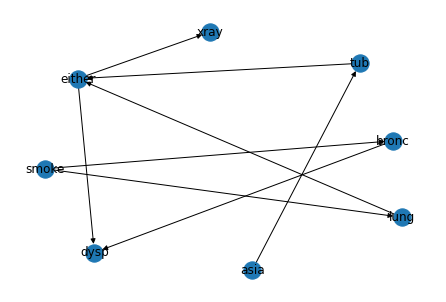

In [ ]:
import networkx as nx
nx.draw(chest_clinic_model, with_labels=True)
plt.show()

In [ ]:
Markov_chest_clinic_model=chest_clinic_model.to_markov_model()

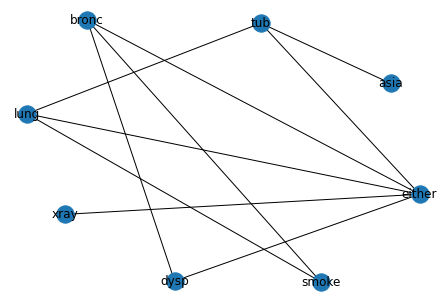

In [ ]:
import networkx as nx
from matplotlib import pyplot as plt
nx.draw(Markov_chest_clinic_model, with_labels=True)
from google.colab import files
plt.savefig("abc.png")
files.download("abc.png") 

In [ ]:
triangulated_MCCM=Markov_chest_clinic_model.triangulate()

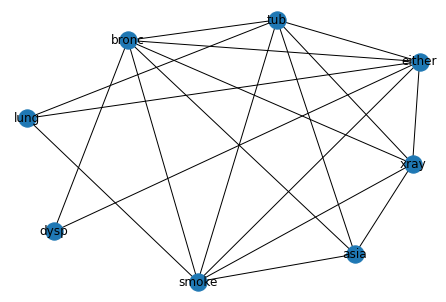

In [ ]:
import networkx as nx
nx.draw(triangulated_MCCM, with_labels=True)
from google.colab import files
plt.savefig("traingulated.png")
files.download("traingulated.png") 

In [ ]:
Junction_tree_MCCM=triangulated_MCCM.to_junction_tree()

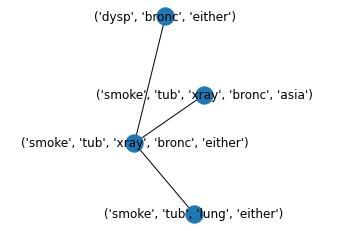

In [ ]:
fig, ax = plt.subplots(1,1)
nx.draw(Junction_tree_MCCM, with_labels=True,ax=ax)
ax.set_xbound(-4,4)
plt.savefig("JT.png")
files.download("JT.png") 
plt.show()
#description = nx.draw_networkx_labels(G,pos,labels=labels)



##Explain why the "running intersection property" is satisfied in your junction tree.
According to the running intersection property if a variable X is present in two cluster it should also be present in the unique path that connects the two cluster. In our example cluster containing ('tub','lung','smoke','asia')
and ('xray','tub','lung','either','bronc') each have variable 'tub' . The two cluster are connected with the cluster('xray','tub','lung') which also has variable tub. hence it follows the property of running the intersection property.

Futher solution written in the report.



